In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve, validation_curve, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_squared_error, r2_score, mean_absolute_error, 
    explained_variance_score, PredictionErrorDisplay
)
from sklearn.inspection import (
    permutation_importance, PartialDependenceDisplay, 
    DecisionBoundaryDisplay
)
from scipy import stats
import shap
import optuna
from sklearn.ensemble import IsolationForest
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
dff = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\housing.csv")
dff.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [57]:
dff = dff.drop(columns="ocean_proximity")

In [5]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
dff.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [7]:
dff.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [8]:
dff.duplicated().sum()

0

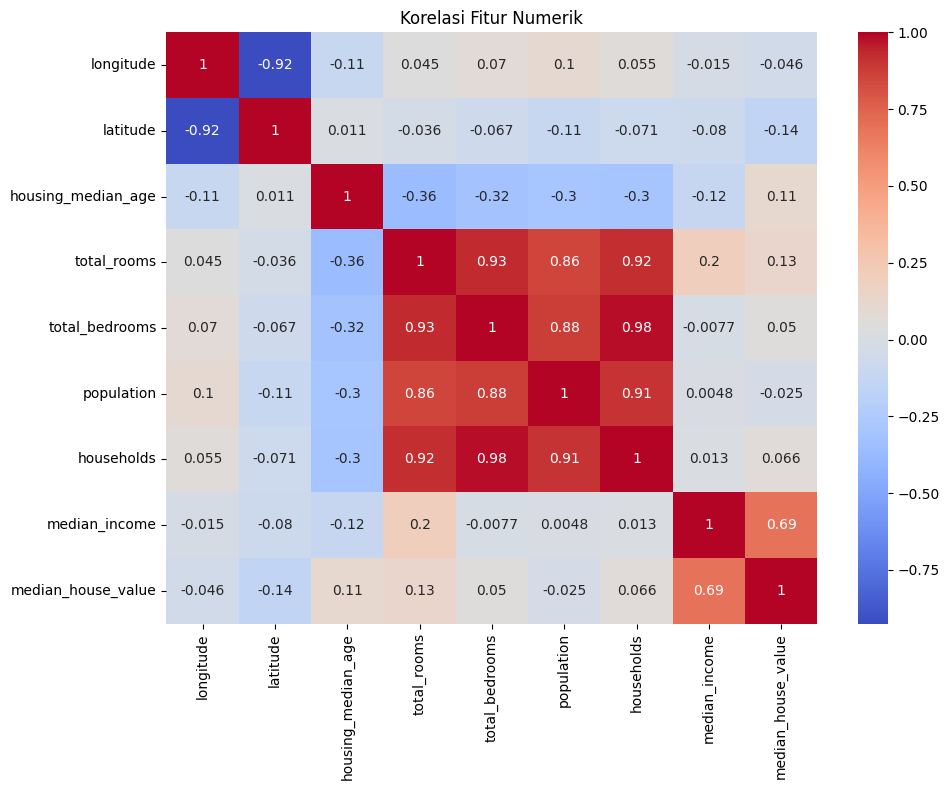

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(dff.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()

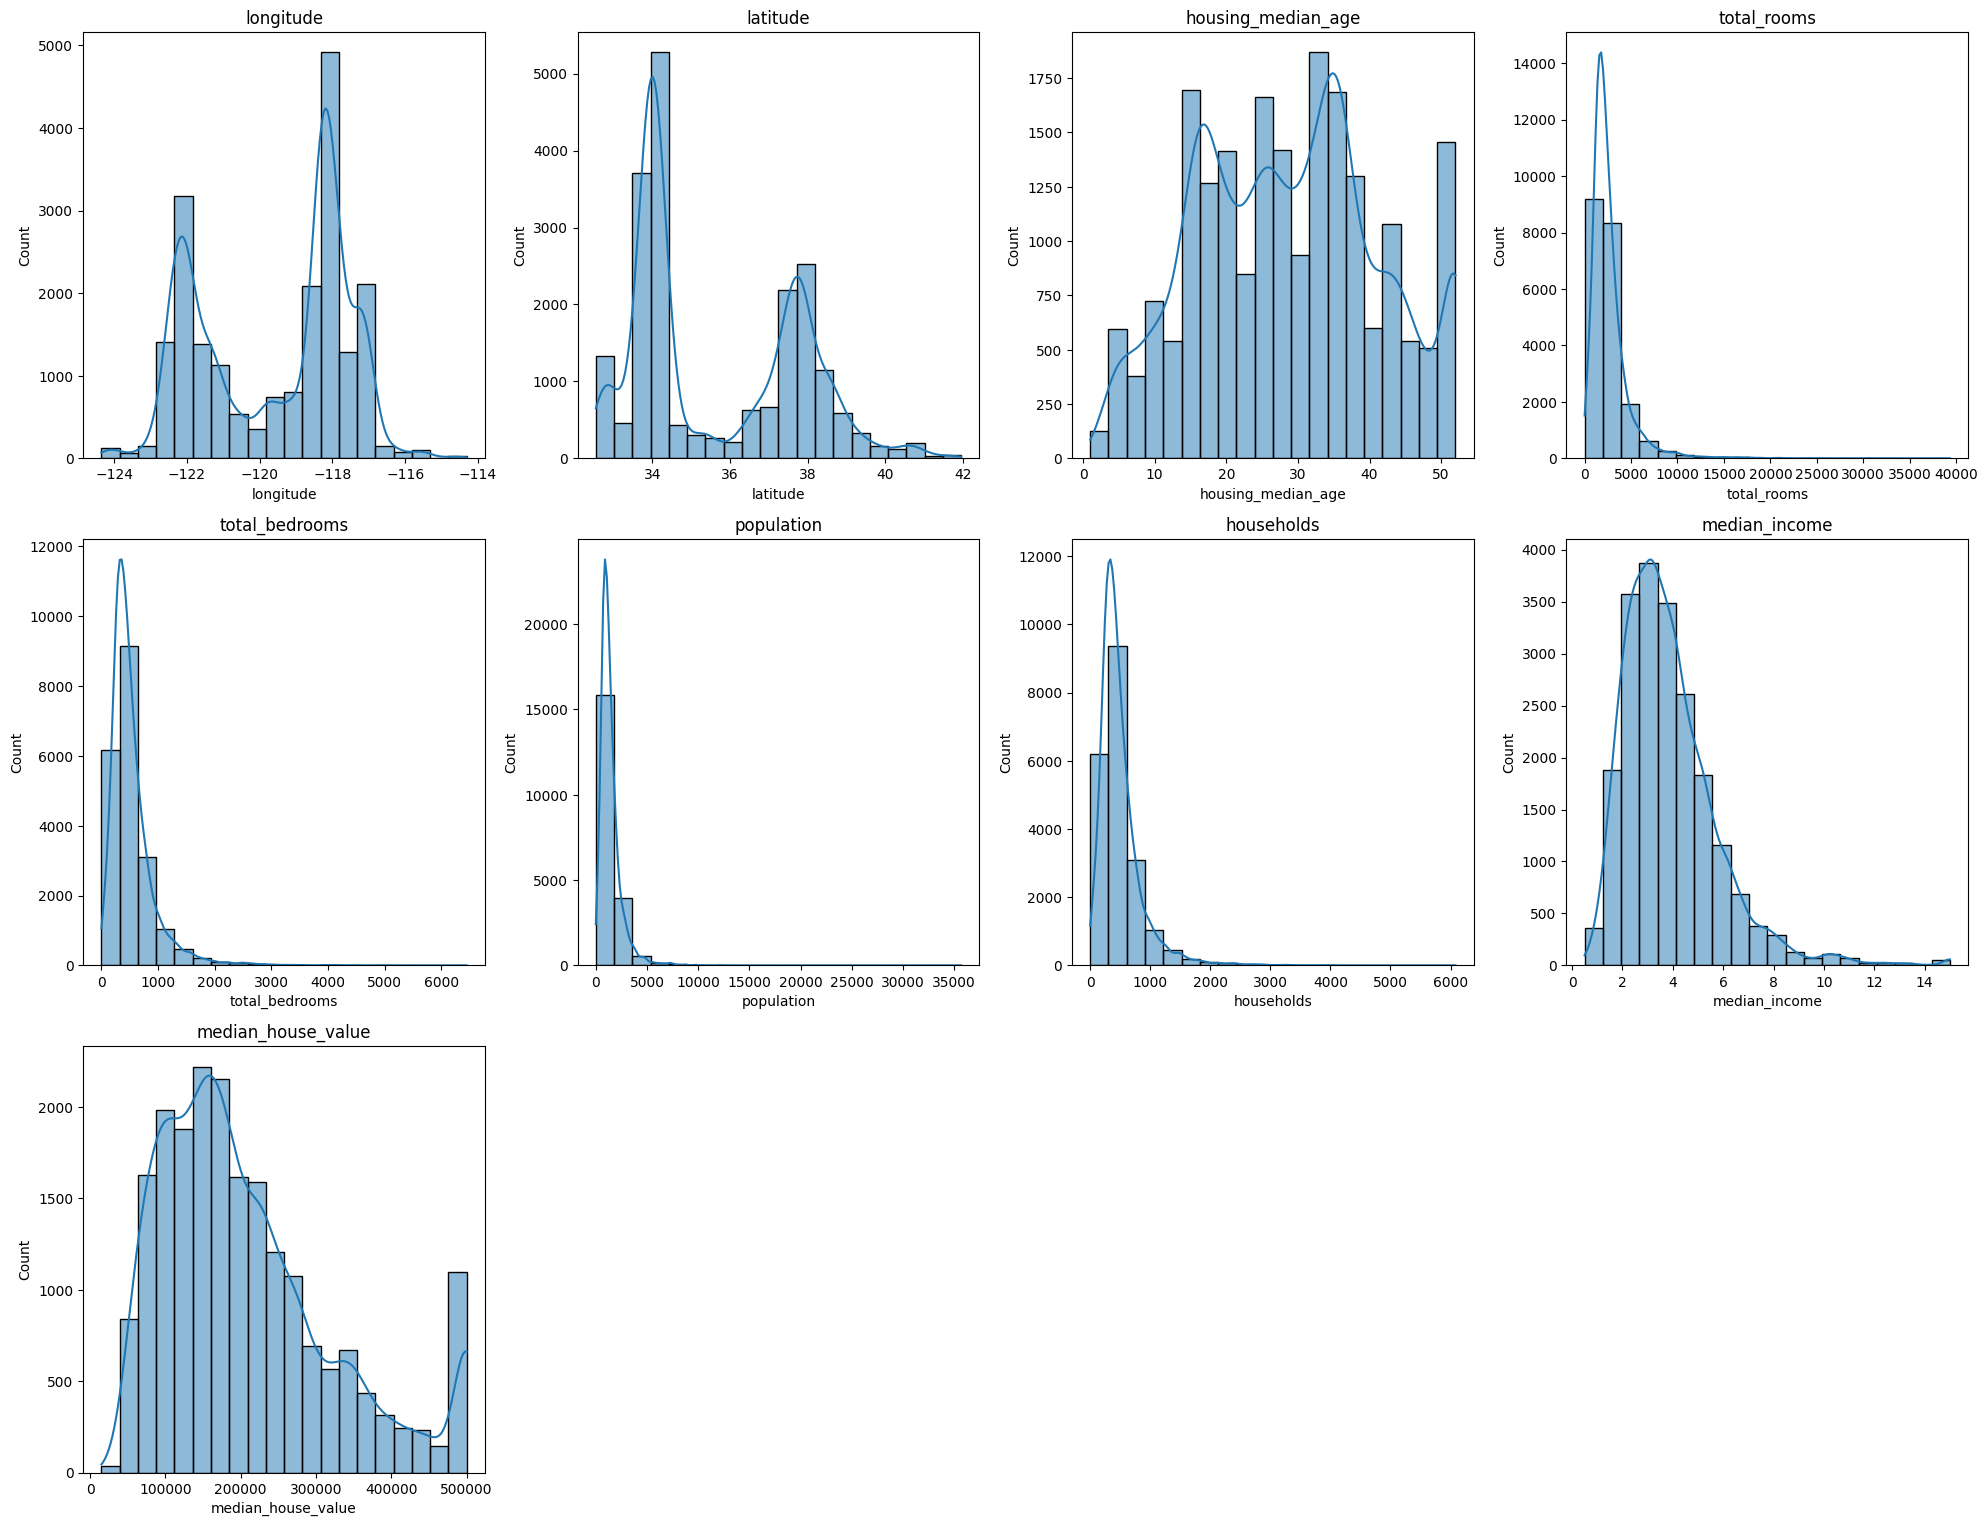

In [11]:
numeric_cols = dff.columns
n_cols = len(numeric_cols)

rows = 4
cols = 4
fig, axs = plt.subplots(rows, cols, figsize=(20, 20))

for i, ax in enumerate(axs.flat):
    if i < n_cols:
        col = numeric_cols[i]
        sns.histplot(dff[col], bins=20, kde=True, ax=ax)
        ax.set_title(f'{col}')
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

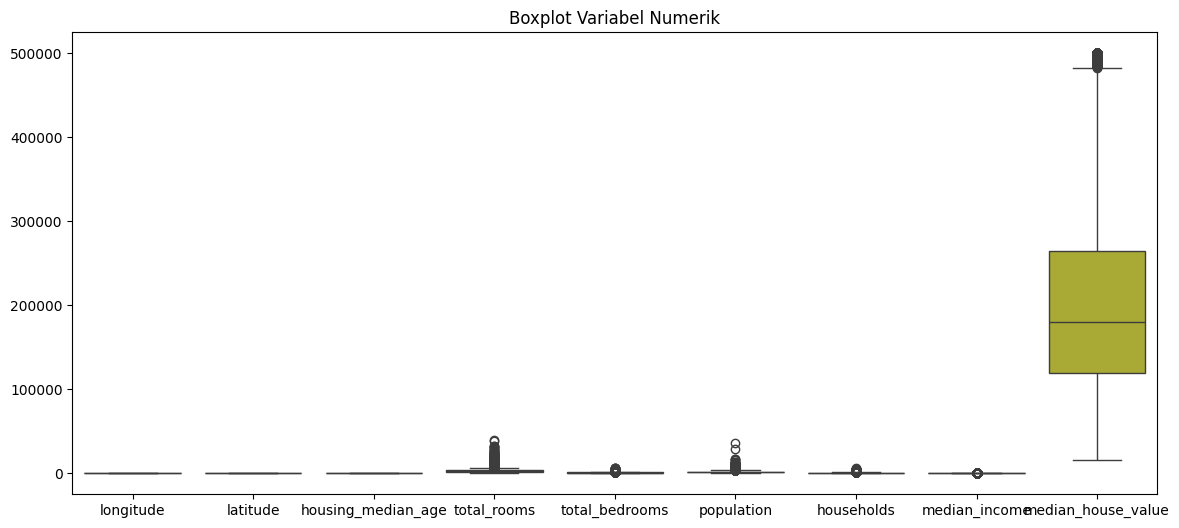

In [14]:
plt.figure(figsize=(14,6))
sns.boxplot(data=dff)
plt.title('Boxplot Variabel Numerik')
plt.show()

<Figure size 2000x2000 with 0 Axes>

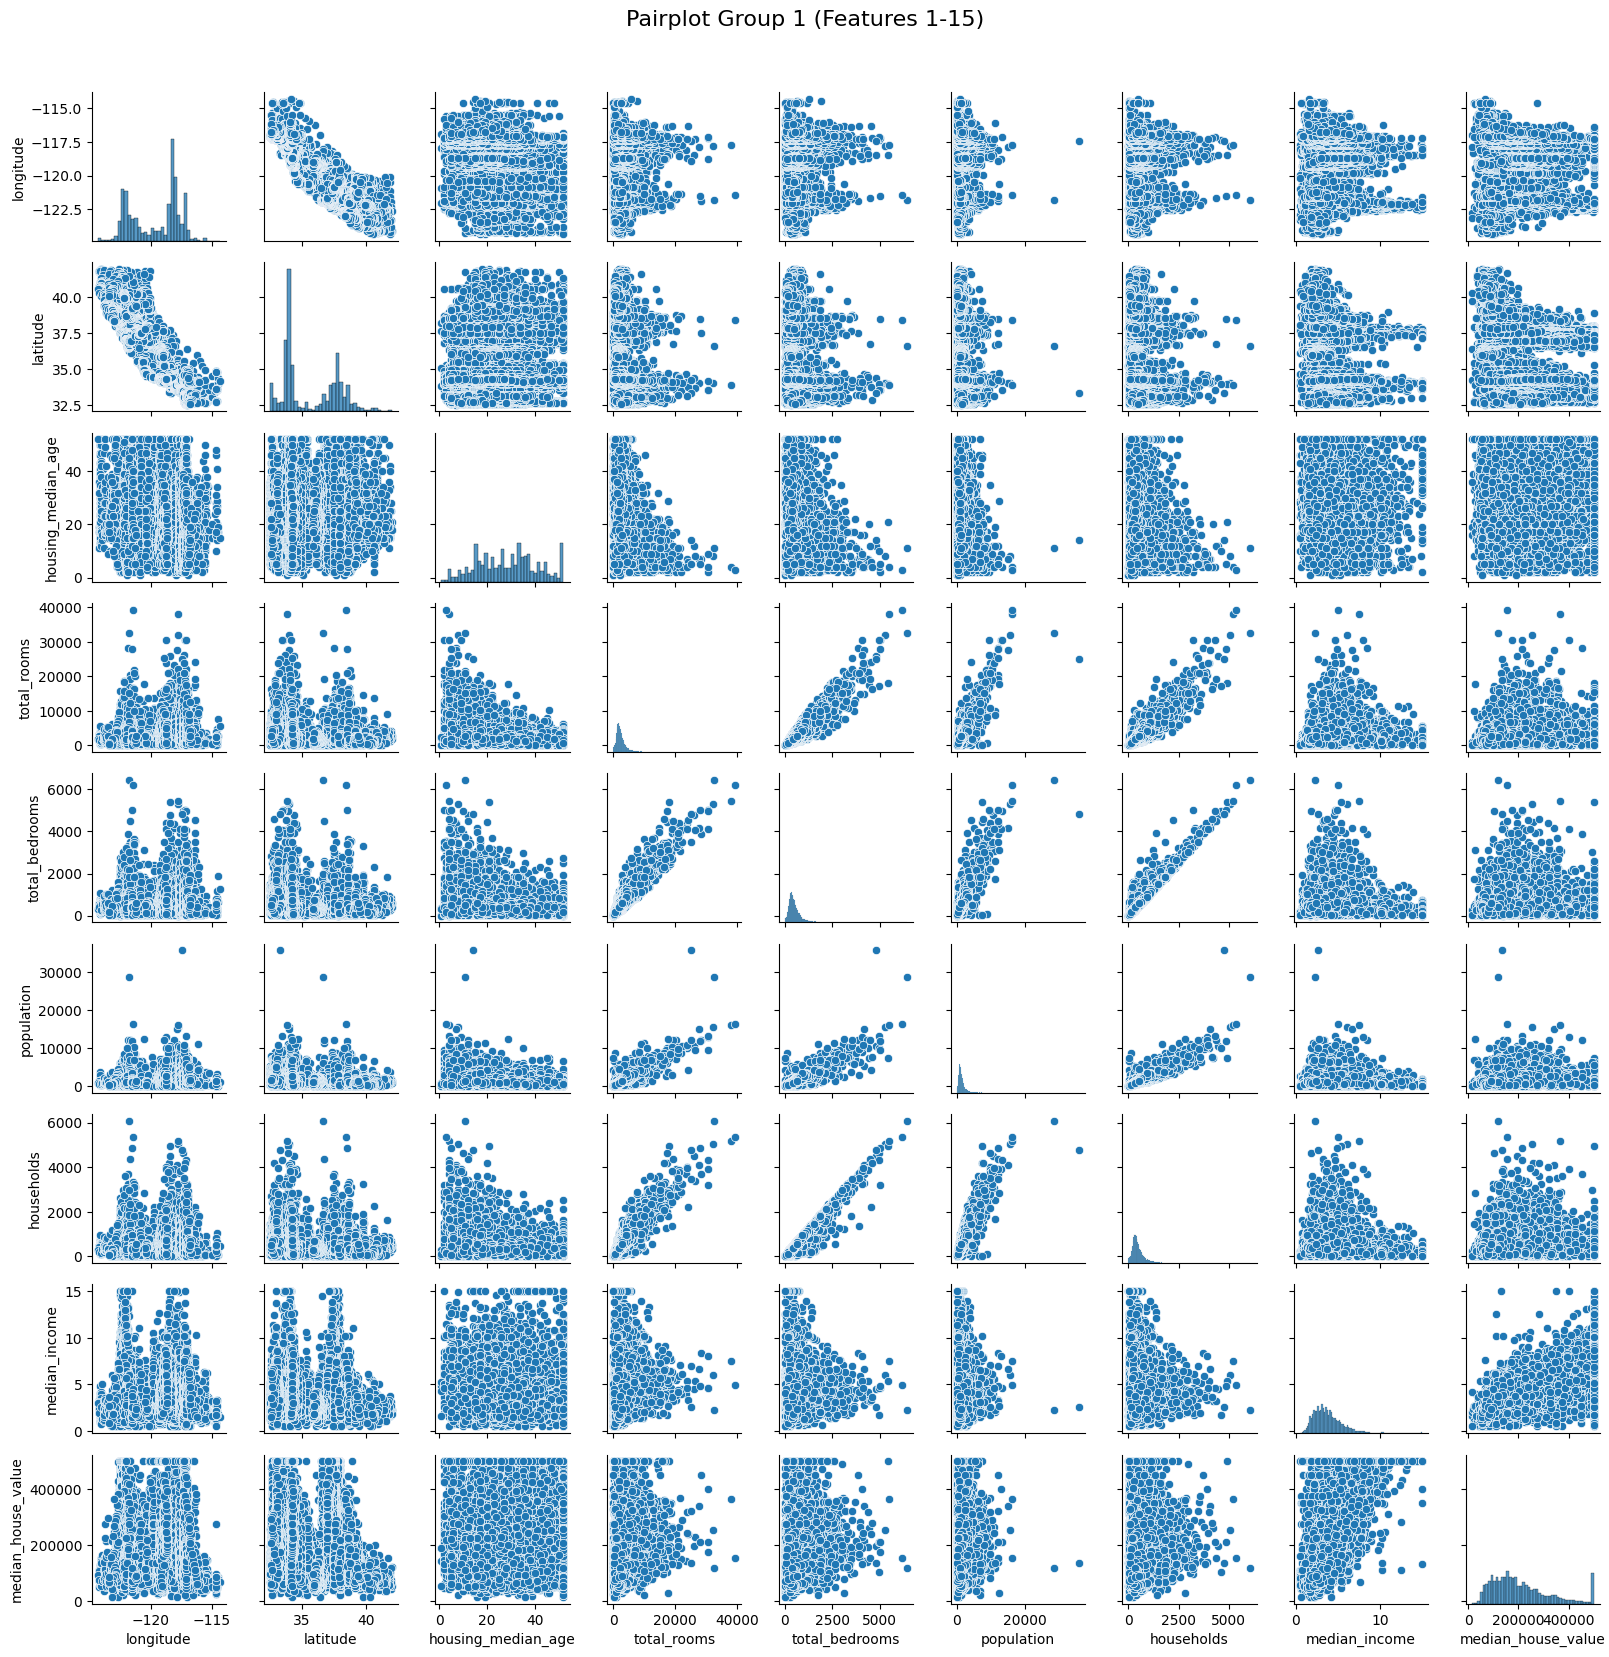

In [16]:
plt.figure(figsize=(20, 20))
g1 = sns.pairplot(dff, height=1.8, corner=False)
plt.suptitle('Pairplot Group 1 (Features 1-15)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

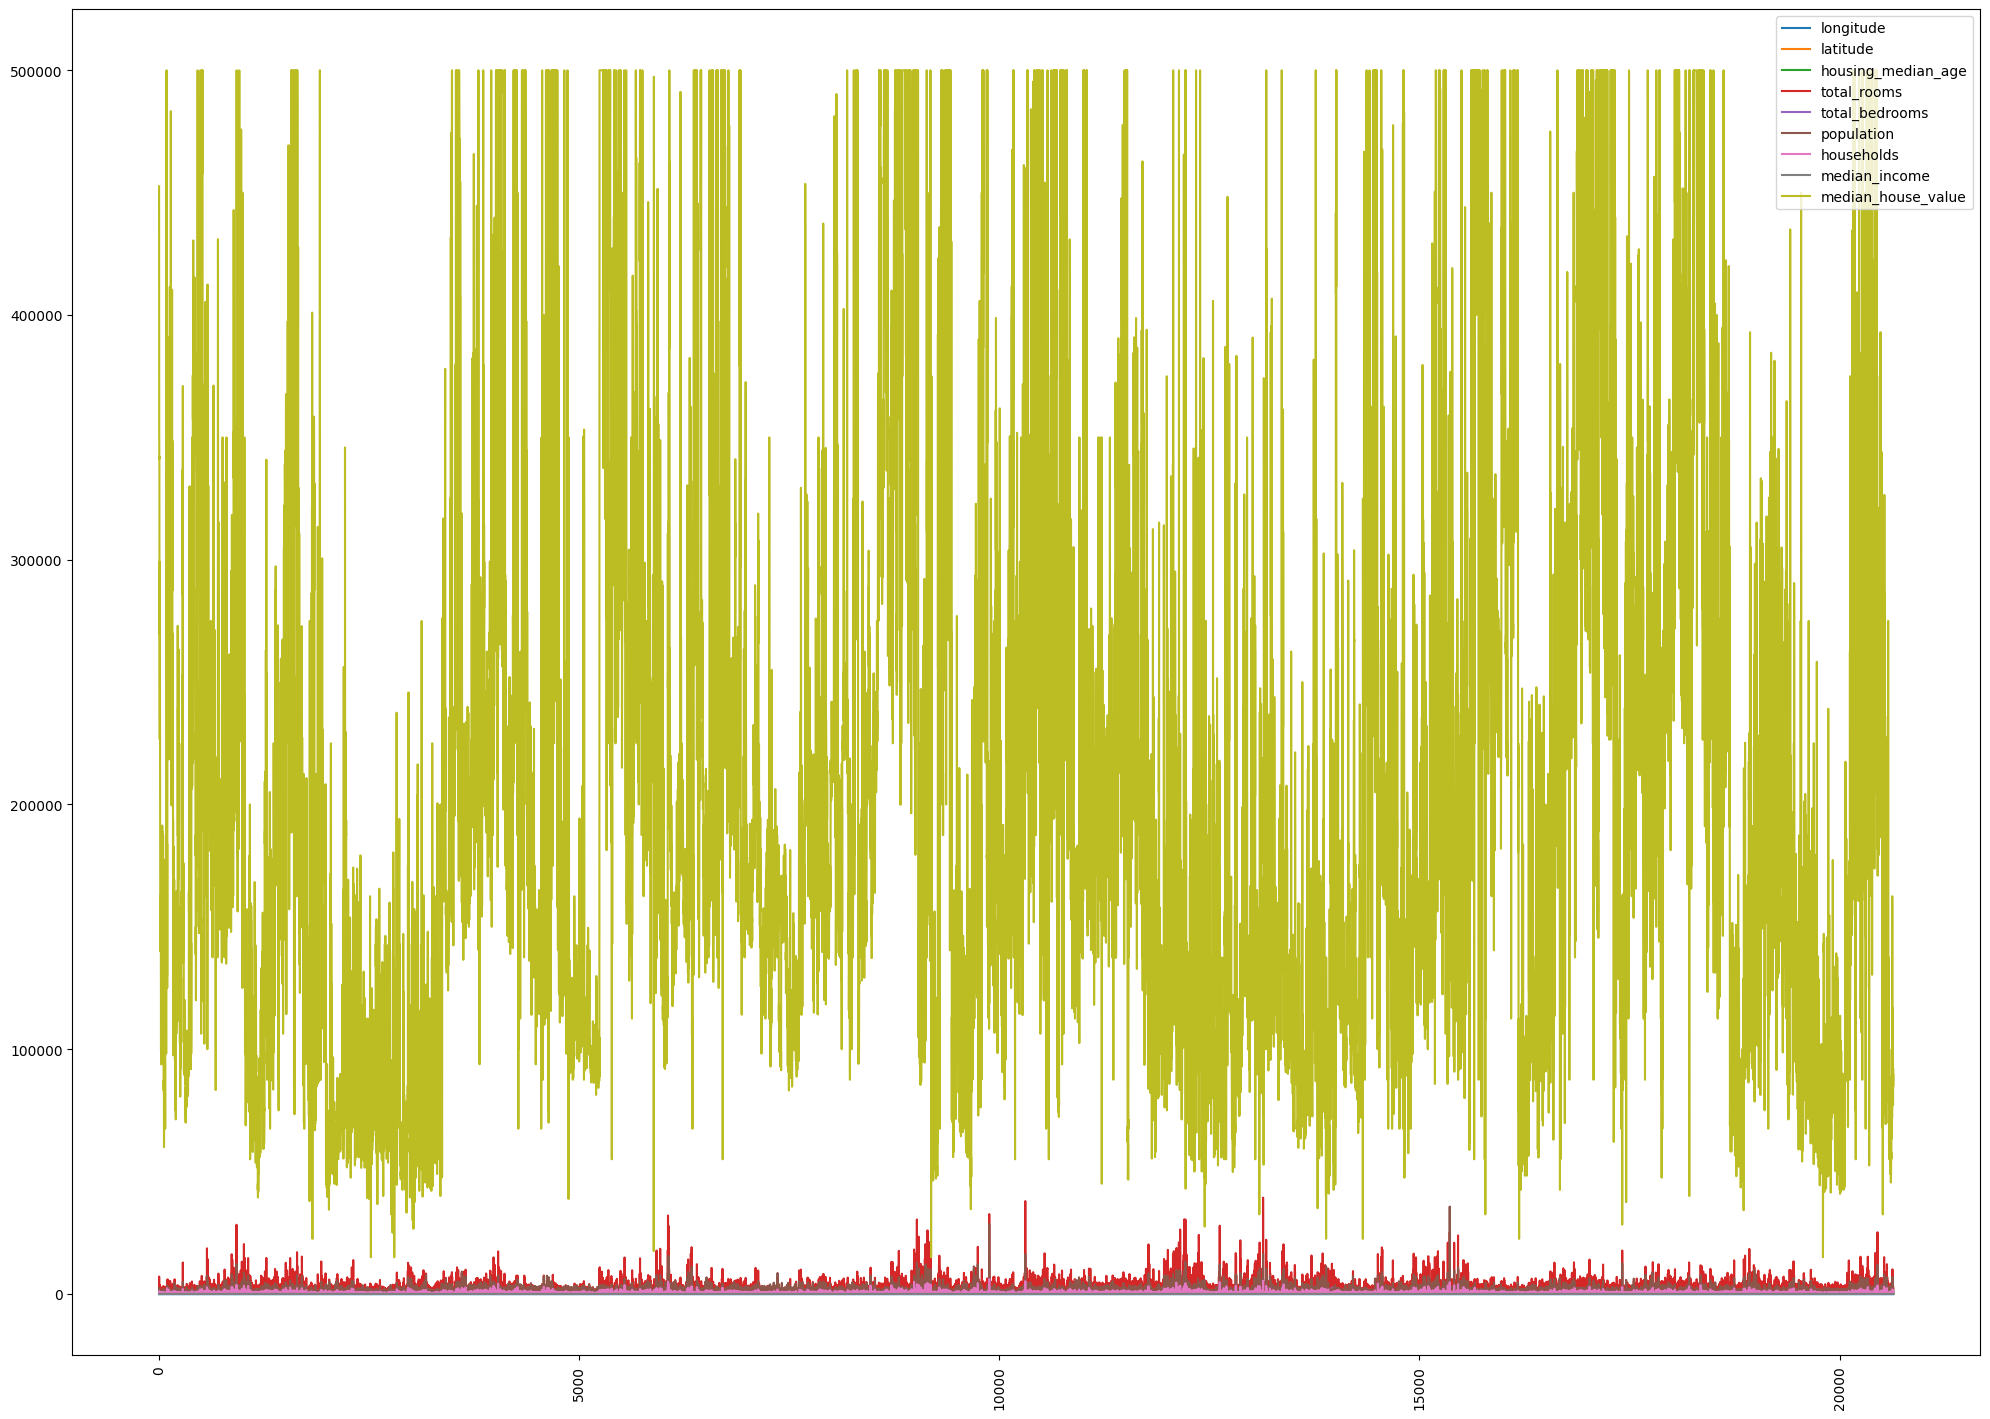

In [17]:
dff.plot(figsize=(20, 14))
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

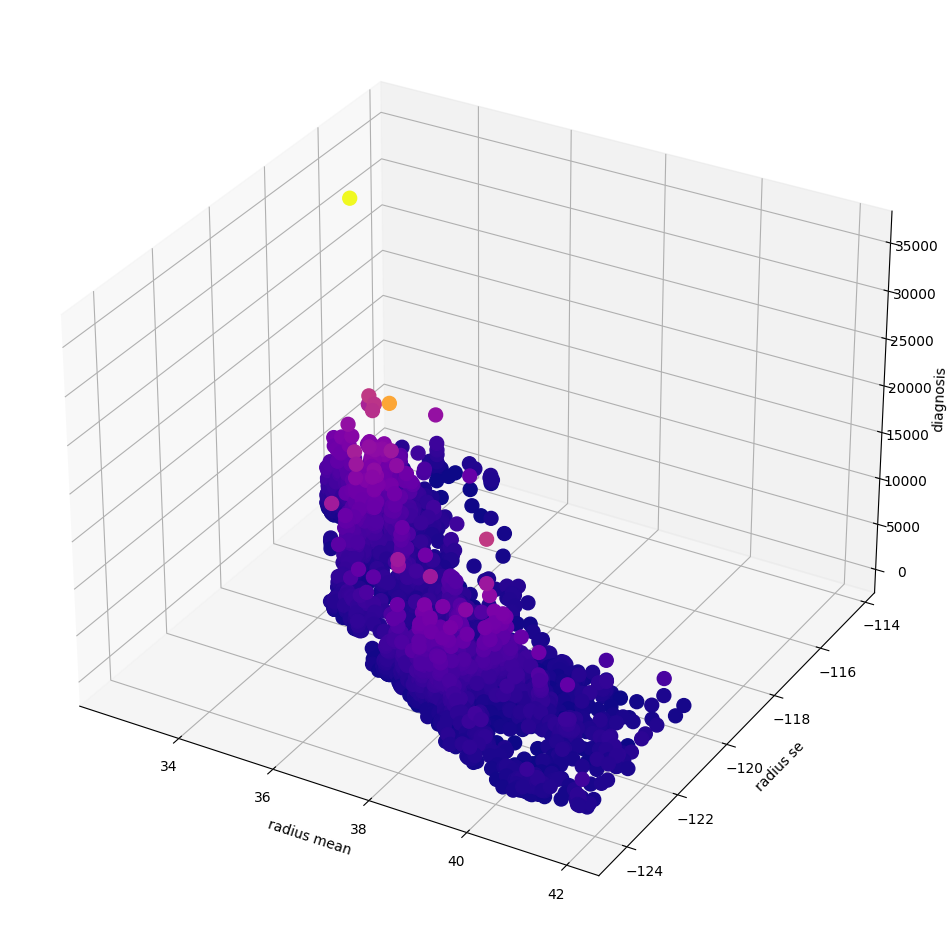

In [18]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

x = dff["latitude"]
y = dff["longitude"]
z = dff["population"]

ax.scatter(x, y, z, c=z, cmap='plasma', s=100, alpha=1)

ax.set_xlabel("radius mean")
ax.set_ylabel("radius se")
ax.set_zlabel("diagnosis")

plt.show()

In [60]:
dff.dropna(inplace=True)
dff.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [23]:
vif = pd.DataFrame()
vif["Feature"] = dff.columns
vif["VIF"] = [variance_inflation_factor(dff.values, i) for i in range(dff.shape[1])]
print("Hasil Uji Multikolinearitas (VIF):\n", vif)

if any(vif["VIF"] > 10):
    print("Terdapat multikolinearitas tinggi (VIF > 10), pertimbangkan untuk menghapus/menggabungkan variabel.\n")
else:
    print("Tidak ada multikolinearitas yang signifikan (VIF < 10), asumsi terpenuhi.\n")

Hasil Uji Multikolinearitas (VIF):
               Feature         VIF
0           longitude  628.973042
1            latitude  565.854523
2  housing_median_age    7.834421
3         total_rooms   30.988720
4      total_bedrooms   94.501318
5          population   17.387185
6          households   92.674951
7       median_income   15.137847
8  median_house_value   10.007223
Terdapat multikolinearitas tinggi (VIF > 10), pertimbangkan untuk menghapus/menggabungkan variabel.



In [26]:
dff.drop(columns="median_house_value", axis=1).shape

(20433, 8)

In [30]:
dff['median_house_value'].shape

(20433,)

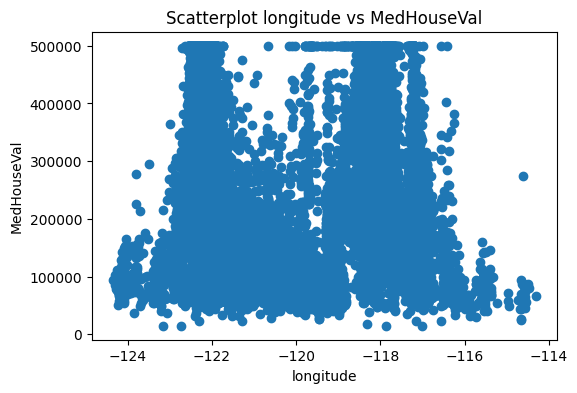

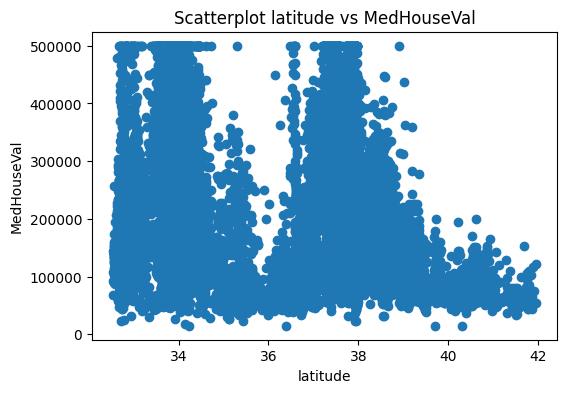

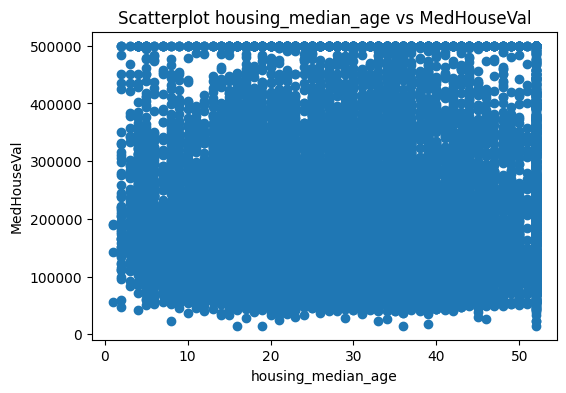

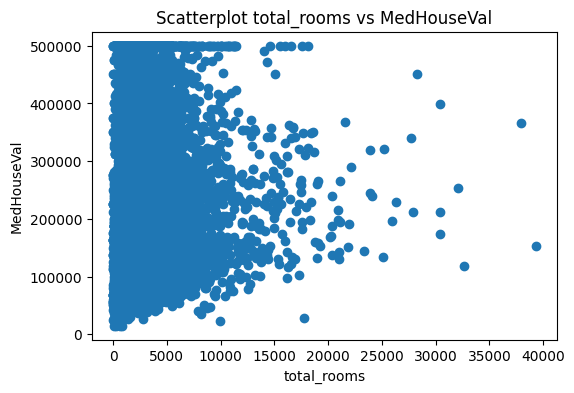

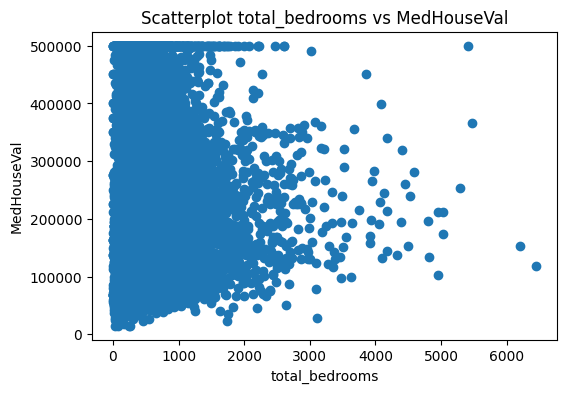

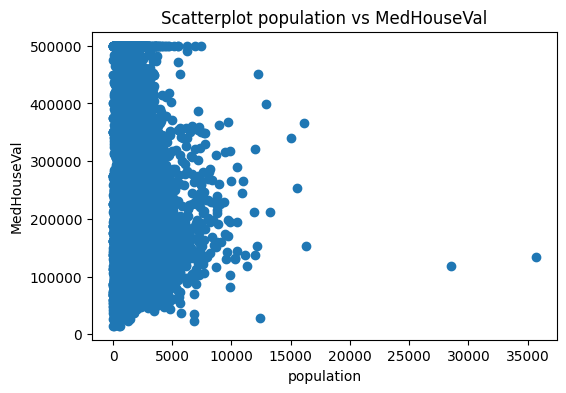

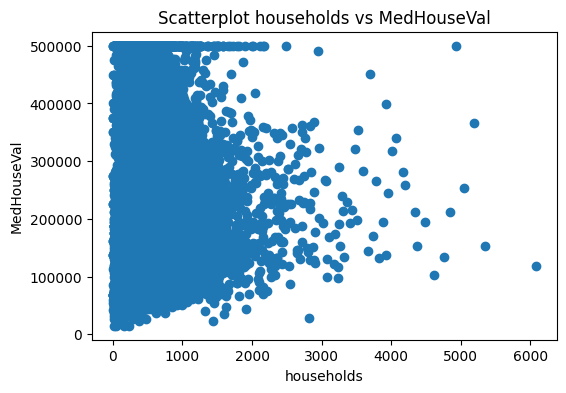

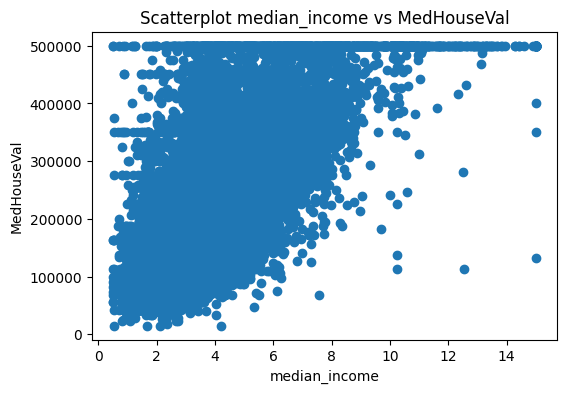

Cek scatterplot apakah hubungan antara X dan Y terlihat linear.



In [31]:
for col in dff.drop(columns="median_house_value", axis=1).columns:
    plt.figure(figsize=(6,4))
    plt.scatter(dff[col], dff['median_house_value'])
    plt.xlabel(col)
    plt.ylabel("MedHouseVal")
    plt.title(f"Scatterplot {col} vs MedHouseVal")
    plt.show()

print("Cek scatterplot apakah hubungan antara X dan Y terlihat linear.\n")

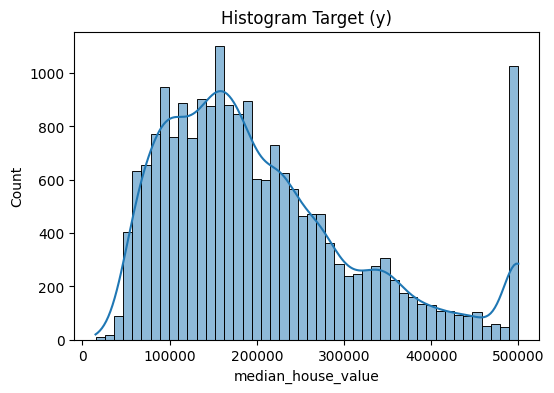

Shapiro-Wilk Test (y): p-value = 0.00000
Target (y) tidak berdistribusi normal (p < 0.05), pertimbangkan transformasi log atau box-cox.



C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [32]:
plt.figure(figsize=(6,4))
sns.histplot(dff["median_house_value"], kde=True)
plt.title("Histogram Target (y)")
plt.show()

alpha = 0.05  
stat, p = stats.shapiro(dff["median_house_value"])
print(f'Shapiro-Wilk Test (y): p-value = {p:.5f}')

if p > alpha:
    print("Target (y) berdistribusi normal (p > 0.05), asumsi normalitas terpenuhi.\n")
else:
    print("Target (y) tidak berdistribusi normal (p < 0.05), pertimbangkan transformasi log atau box-cox.\n")

In [61]:
outlier_detection = IsolationForest(contamination=0.1, random_state=42)

In [62]:
outlier_prediksi = outlier_detection.fit_predict(dff)

In [63]:
dff = dff[outlier_prediksi == 1]

In [64]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18389 entries, 2 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18389 non-null  float64
 1   latitude            18389 non-null  float64
 2   housing_median_age  18389 non-null  float64
 3   total_rooms         18389 non-null  float64
 4   total_bedrooms      18389 non-null  float64
 5   population          18389 non-null  float64
 6   households          18389 non-null  float64
 7   median_income       18389 non-null  float64
 8   median_house_value  18389 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [65]:
X = dff.drop(columns="median_house_value", axis=1)
y = dff["median_house_value"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_regression)),
    ('pca', PCA()),
    ('regressor', SGDRegressor(random_state=42))
])

In [70]:
param_grid = {
    'selector__k': [4, 6, 8],
    'pca__n_components': [None, 2, 3],
    'regressor__alpha': [0.0001, 0.001, 0.01],
    'regressor__penalty': ['l2', 'l1', 'elasticnet'],
    'regressor__learning_rate':[0.001, 0.01, 0.1, 'adaptive']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    pipeline, param_grid, cv=cv, 
    scoring='r2', 
    verbose=1, n_jobs=-1
)
grid_search.fit(X_train, y_train)
print("Best Parameter:",grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameter: {'pca__n_components': None, 'regressor__alpha': 0.0001, 'regressor__learning_rate': 'adaptive', 'regressor__penalty': 'l2', 'selector__k': 8}
Best Score: 0.6358379910926237


C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1215 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
167 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Robyi\A

In [71]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [72]:
metrics = {
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R²': r2_score(y_test, y_pred),
    'Explained Variance': explained_variance_score(y_test, y_pred),
    'Max Error': max(abs(y_test - y_pred)),
    'Cross-Val R² (5-fold)': cross_val_score(best_model, X_train, y_train, cv=cv, scoring='r2').mean()
}

pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])

C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,Value
MSE,4.145118e+09
RMSE,6.438259e+04
MAE,4.784368e+04
R²,6.330070e-01
Explained Variance,6.330125e-01
Max Error,3.357088e+05
Cross-Val R² (5-fold),6.358380e-01


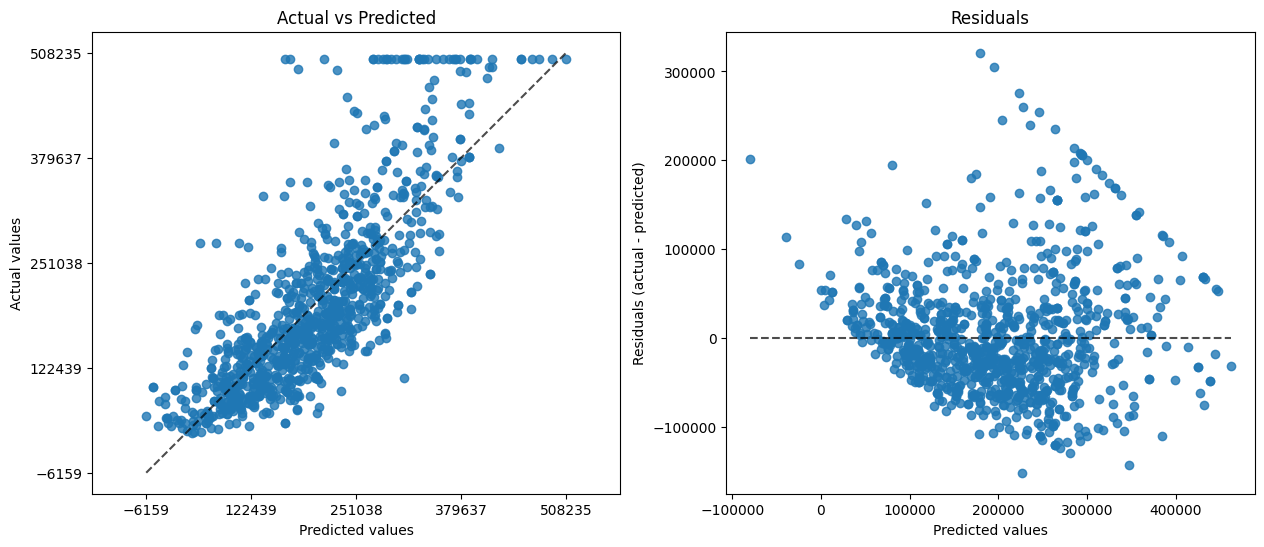

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

PredictionErrorDisplay.from_predictions(
    y_test, y_pred, ax=ax1, kind="actual_vs_predicted"
)
ax1.set_title("Actual vs Predicted")

PredictionErrorDisplay.from_predictions(
    y_test, y_pred, ax=ax2, kind="residual_vs_predicted"
)
ax2.set_title("Residuals")
plt.show()

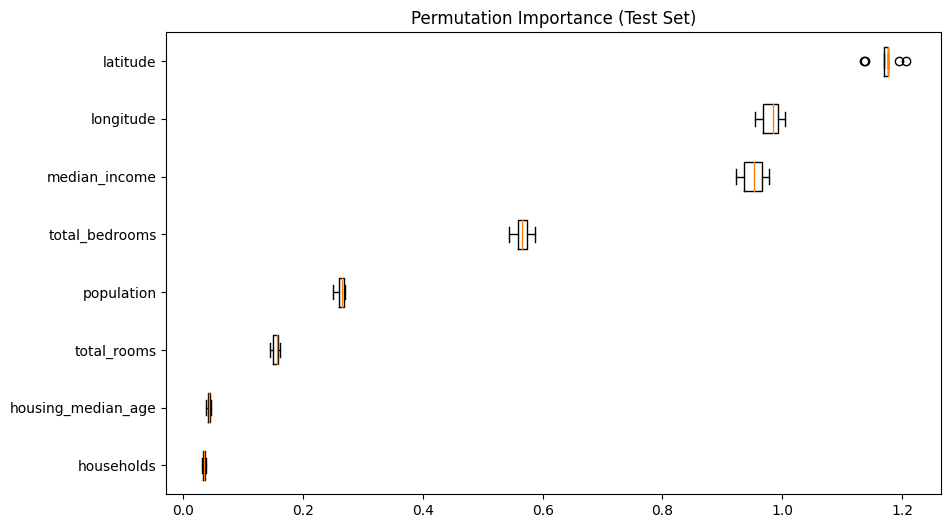

In [77]:
result = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42
)

feature_names = X.columns

sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names)[sorted_idx]
)
plt.title("Permutation Importance (Test Set)")
plt.show()

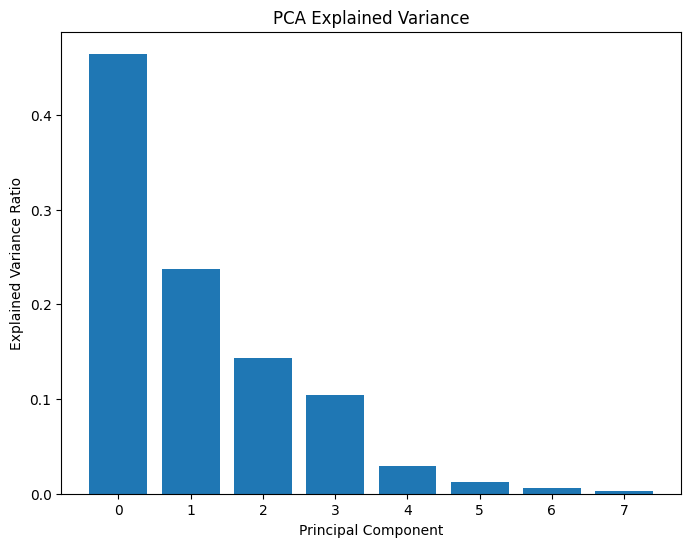

In [75]:
pca = best_model.named_steps['pca']
if pca.n_components_ is not None:
    plt.figure(figsize=(8, 6))
    plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
    plt.xlabel("Principal Component")
    plt.ylabel("Explained Variance Ratio")
    plt.title("PCA Explained Variance")
    plt.show()

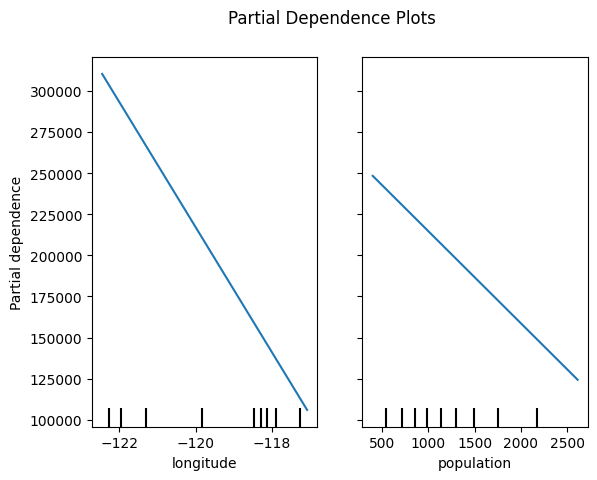

In [78]:
features_to_plot = [0, 5] 
PartialDependenceDisplay.from_estimator(
    best_model, X_train, features_to_plot, 
    feature_names=feature_names, grid_resolution=20
)
plt.suptitle("Partial Dependence Plots")
plt.show()

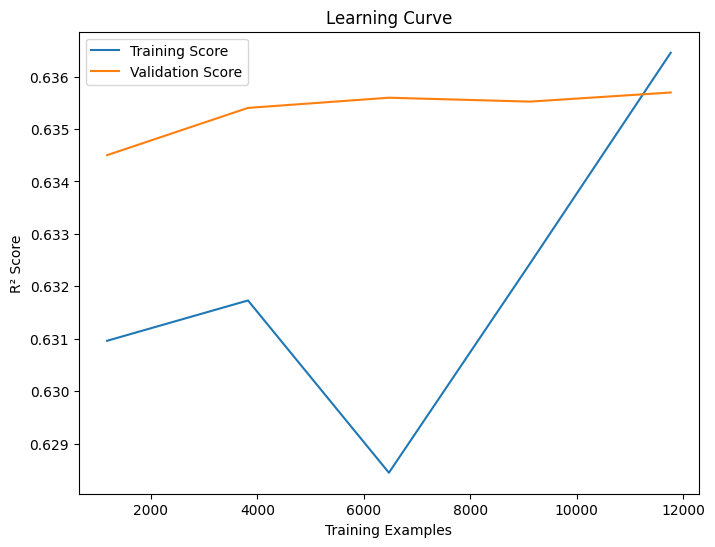

In [79]:
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='r2'
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("R² Score")
plt.legend()
plt.title("Learning Curve")
plt.show()

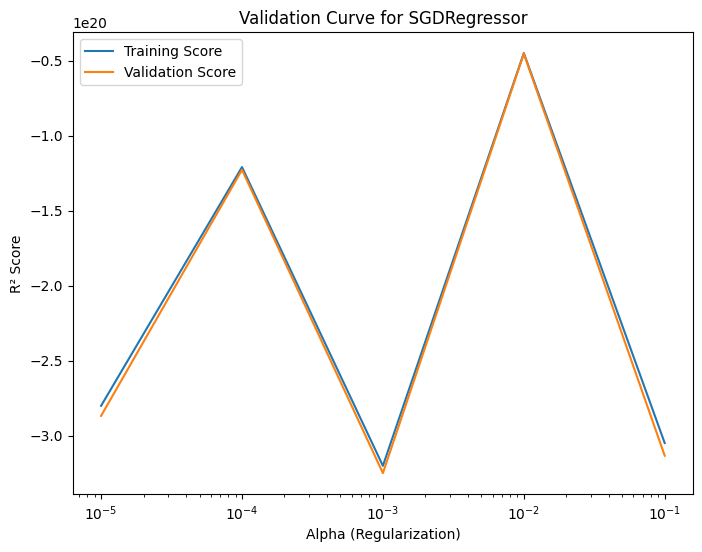

In [80]:
param_range = np.logspace(-5, -1, 5)
train_scores, test_scores = validation_curve(
    SGDRegressor(random_state=42), X_train, y_train,
    param_name="alpha", param_range=param_range, cv=5, scoring="r2"
)

plt.figure(figsize=(8, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Validation Score")
plt.xscale("log")
plt.xlabel("Alpha (Regularization)")
plt.ylabel("R² Score")
plt.legend()
plt.title("Validation Curve for SGDRegressor")
plt.show()

In [82]:
residuals = y_test - y_pred
ci = stats.norm.interval(0.95, loc=np.mean(residuals), scale=np.std(residuals))
print(f"95% CI for Residuals: ({ci[0]:.3f}, {ci[1]:.3f})")

nir = np.mean((y_test - np.mean(y_train))**2)
print(f"No Information Rate (NIR - MSE Baseline): {nir:.3f}")
print(f"P-value (MSE < NIR): {stats.ttest_1samp(y_test - y_pred, 0).pvalue:.3e}")

95% CI for Residuals: (-125938.739, 126434.498)
No Information Rate (NIR - MSE Baseline): 11300931586.493
P-value (MSE < NIR): 8.154e-01


In [85]:
pipeline.fit(X_train, y_train)

kbest_scores = pipeline.named_steps['selector'].scores_
feature_names = pipeline.named_steps['selector'].get_feature_names_out()

feature_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Score': kbest_scores
}).sort_values('Score', ascending=False)

print("\nFeature Scores from KBest:")
print(feature_scores_df)


Feature Scores from KBest:
              Feature         Score
7       median_income  11353.279801
3         total_rooms    378.434991
1            latitude    345.461351
2  housing_median_age    251.723131
5          population     70.475279
6          households     67.141232
4      total_bedrooms     29.476495
0           longitude     23.528148


C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


In [86]:
cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='r2')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.6421562  0.64250545 0.62234804 0.64672555 0.62545471]
Mean CV Accuracy: 0.6358379910926237


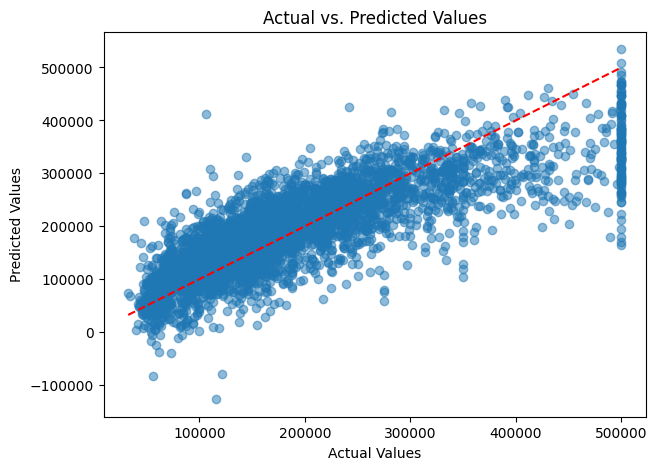

In [87]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

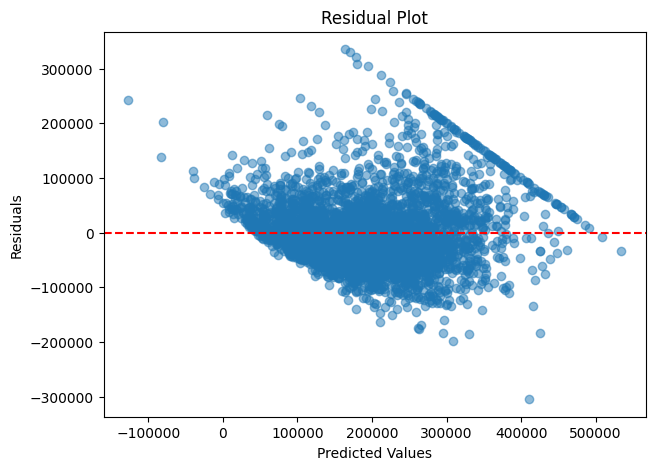

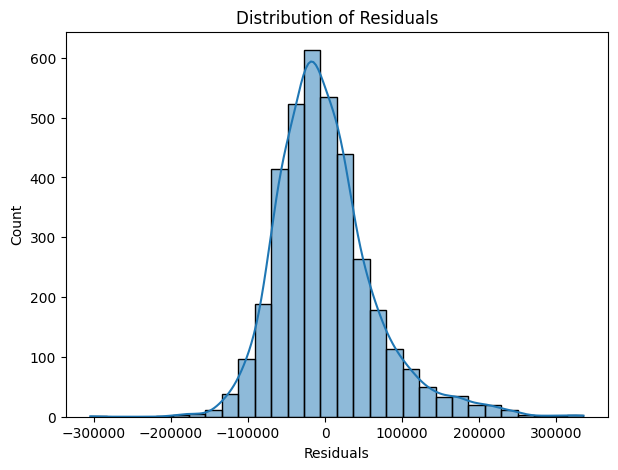

In [90]:
residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

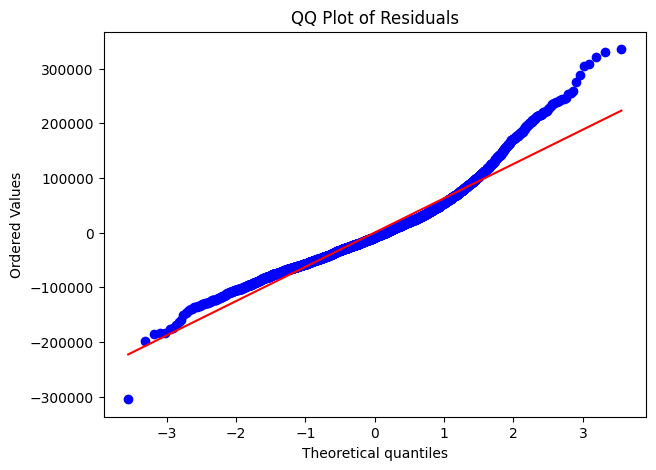

In [91]:
plt.figure(figsize=(7, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

C:\Users\Robyi\AppData\Local\Temp\ipykernel_17940\3207917033.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=X.columns, orient="h", palette="viridis")


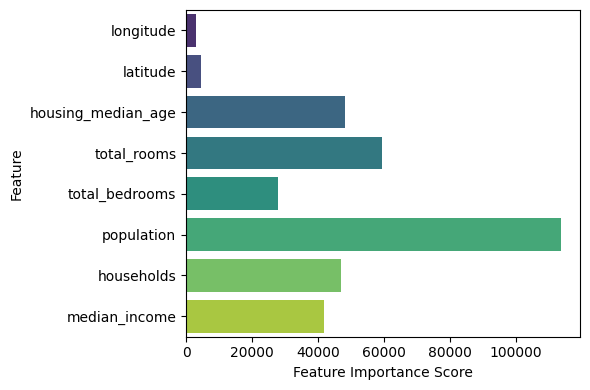

In [93]:
sgd = best_model.named_steps['regressor']
feature_importance = np.abs(sgd.coef_)

plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importance, y=X.columns, orient="h", palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()

C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


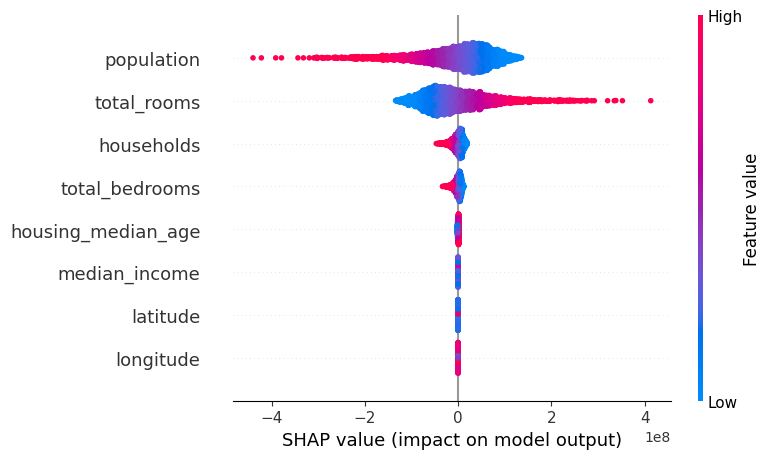

In [100]:
pipeline.fit(X_train, y_train)

explainer = shap.Explainer(pipeline.named_steps['regressor'], X_train)

shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)